<a href="https://colab.research.google.com/github/ysooch0819/AI16-Projects/blob/main/n431%20%EA%B0%95%EC%9D%98%EB%85%B8%ED%8A%B8%20%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 60s 0us/step


In [4]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train,
          batch_size=128,
          validation_data=(X_val, y_val),
          epochs=10)

Epoch 1/10
313/313 [==============================] - 11s 9ms/step - loss: 1.6079 - accuracy: 0.4167 - val_loss: 1.3667 - val_accuracy: 0.5101
Epoch 2/10
313/313 [==============================] - 3s 8ms/step - loss: 1.1836 - accuracy: 0.5814 - val_loss: 1.0725 - val_accuracy: 0.6200
Epoch 3/10
313/313 [==============================] - 3s 9ms/step - loss: 1.0006 - accuracy: 0.6465 - val_loss: 1.0323 - val_accuracy: 0.6371
Epoch 4/10
313/313 [==============================] - 3s 10ms/step - loss: 0.8781 - accuracy: 0.6923 - val_loss: 0.9075 - val_accuracy: 0.6807
Epoch 5/10
313/313 [==============================] - 2s 7ms/step - loss: 0.7846 - accuracy: 0.7253 - val_loss: 0.8596 - val_accuracy: 0.7025
Epoch 6/10
313/313 [==============================] - 2s 7ms/step - loss: 0.7066 - accuracy: 0.7523 - val_loss: 0.8536 - val_accuracy: 0.7019
Epoch 7/10
313/313 [==============================] - 2s 7ms/step - loss: 0.6348 - accuracy: 0.7790 - val_loss: 0.8547 - val_accuracy: 0.7079
Epoc

In [9]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.8681 - accuracy: 0.7223 - 845ms/epoch - 3ms/step


[0.8681068420410156, 0.7222999930381775]

In [10]:
# 전이학습
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

In [11]:
pretrained_model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [12]:
model = Sequential()
model.add(pretrained_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 14,781,642
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train,
          batch_size=128,
          validation_data=(X_val, y_val),
          epochs=10)

Epoch 1/10
313/313 [==============================] - 23s 67ms/step - loss: 1.9101 - accuracy: 0.2239 - val_loss: 1.9183 - val_accuracy: 0.2811
Epoch 2/10
313/313 [==============================] - 19s 61ms/step - loss: 1.3961 - accuracy: 0.4576 - val_loss: 1.2083 - val_accuracy: 0.5684
Epoch 3/10
313/313 [==============================] - 19s 61ms/step - loss: 1.0074 - accuracy: 0.6443 - val_loss: 0.9216 - val_accuracy: 0.6731
Epoch 4/10
313/313 [==============================] - 21s 66ms/step - loss: 0.8110 - accuracy: 0.7158 - val_loss: 0.8571 - val_accuracy: 0.6933
Epoch 5/10
313/313 [==============================] - 20s 63ms/step - loss: 0.6652 - accuracy: 0.7720 - val_loss: 0.7282 - val_accuracy: 0.7530
Epoch 6/10
313/313 [==============================] - 20s 63ms/step - loss: 0.5590 - accuracy: 0.8112 - val_loss: 0.7187 - val_accuracy: 0.7620
Epoch 7/10
313/313 [==============================] - 19s 62ms/step - loss: 0.4795 - accuracy: 0.8393 - val_loss: 0.7103 - val_accuracy:

In [16]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 3s - loss: 0.8791 - accuracy: 0.7699 - 3s/epoch - 10ms/step


[0.8790902495384216, 0.7699000239372253]

In [17]:
# 데이터 증강
!pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 KB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.3 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.1.21 which is incompatible.


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [52]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

In [22]:
metadata.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
})

In [50]:
num_classes = metadata.features['label'].num_classes
num_classes

5

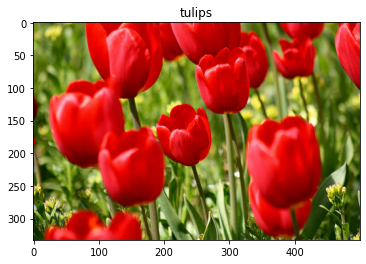

In [53]:
get_label_name = metadata.features['label'].int2str
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [37]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

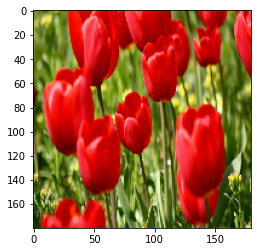

In [40]:
result = resize_and_rescale(image)
_ = plt.imshow(result)

In [28]:
print("Min and Max pixel values:", result.numpy().min(), result.numpy().max())

Min and Max pixel values: 0.0 1.0


In [33]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [30]:
image = tf.expand_dims(image, 0)

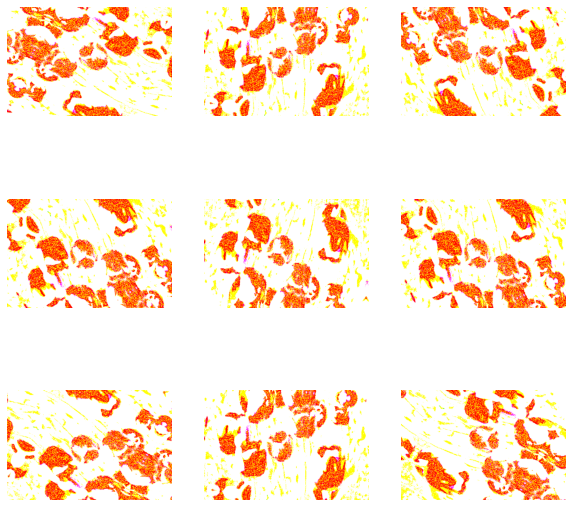

In [34]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [35]:
batch_size = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)
  
  if shuffle:
    ds = ds.shuffle(1000)
  
  ds = ds.batch(batch_size)

  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)
  
  return ds.prefetch(buffer_size=AUTOTUNE)


In [41]:
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

In [42]:
model = tf.keras.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
epochs=5
history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 21s 198ms/step - loss: 1.3770 - accuracy: 0.4135 - val_loss: 1.0853 - val_accuracy: 0.5204
Epoch 2/5
92/92 [==============================] - 16s 161ms/step - loss: 1.0776 - accuracy: 0.5559 - val_loss: 1.0333 - val_accuracy: 0.5831
Epoch 3/5
92/92 [==============================] - 16s 160ms/step - loss: 0.9910 - accuracy: 0.6161 - val_loss: 0.9552 - val_accuracy: 0.6240
Epoch 4/5
92/92 [==============================] - 17s 171ms/step - loss: 0.9461 - accuracy: 0.6189 - val_loss: 0.9181 - val_accuracy: 0.6458
Epoch 5/5
92/92 [==============================] - 13s 129ms/step - loss: 0.8674 - accuracy: 0.6591 - val_loss: 0.9053 - val_accuracy: 0.6431


In [45]:
loss, acc = model.evaluate(test_ds)
print('정확도:', acc)

12/12 [==============================] - 1s 54ms/step - loss: 0.8681 - accuracy: 0.6185
정확도: 0.6185286045074463


In [46]:
def random_invert_img(x, p=0.5):
  if tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

In [47]:
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

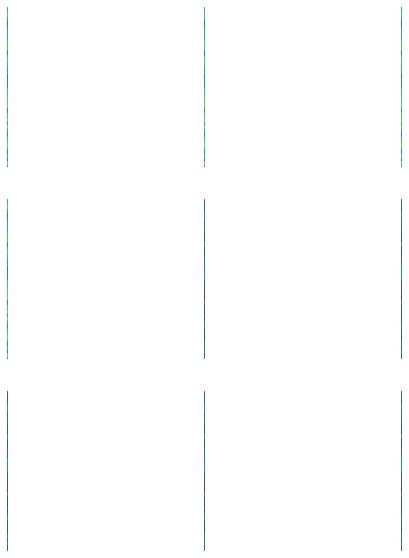

In [54]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")